#**KNN - K Nearest Neighbors - Classification**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r'/content/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


#**Data Exploration**

In [43]:
df.shape

(3000, 3)

In [44]:
df.isnull().sum()

,0
Gene One,0
Gene Two,0
Cancer Present,0


In [45]:
df.duplicated().sum()

np.int64(862)

In [46]:
df.drop_duplicates(inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2138 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        2138 non-null   float64
 1   Gene Two        2138 non-null   float64
 2   Cancer Present  2138 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 66.8 KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,2138.0,5.590365,1.859242,1.0,4.2,5.6,6.9,10.0
Gene Two,2138.0,5.405285,1.749803,1.0,4.1,5.4,6.7,10.0
Cancer Present,2138.0,0.496726,0.500106,0.0,0.0,0.0,1.0,1.0


In [49]:
df['Cancer Present'].value_counts()

,count
Cancer Present,
0,1076
1,1062


<Axes: xlabel='Cancer Present', ylabel='count'>

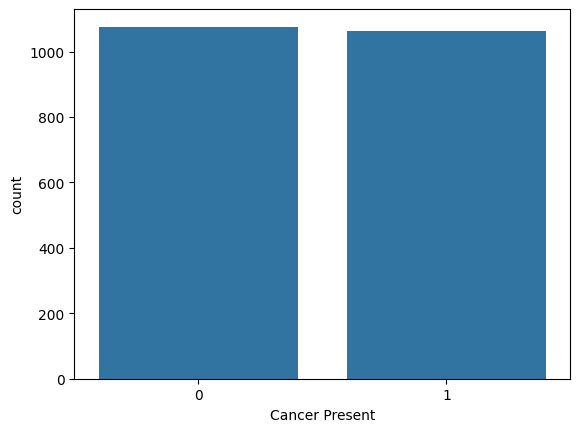

In [50]:
sns.countplot(data = df,x = df['Cancer Present'])

<Axes: >

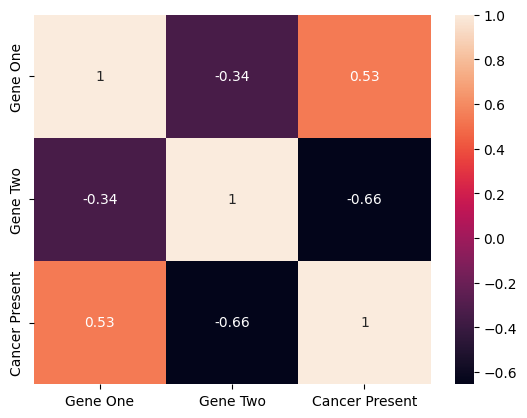

In [51]:
sns.heatmap(df.corr(),annot = True)

From the chart above, we can see that there is

 * a positive correlation with Gene One and Cancer Present
 * and a negative corrleation with Gene Two and Cancer Present.

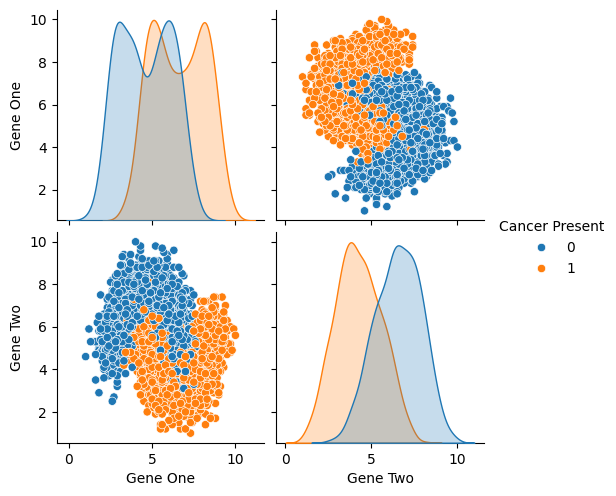

In [52]:
sns.pairplot(df,hue = 'Cancer Present')

Seem like Gene One Cancer Present or not, are overlapped a lot than in Gene Two.

<Axes: xlabel='Gene One', ylabel='Gene Two'>

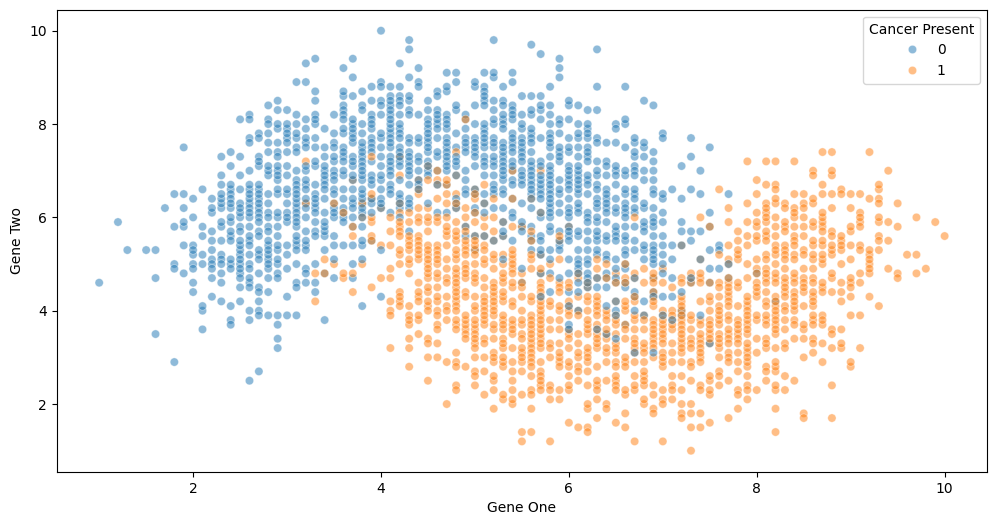

In [53]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df,x = 'Gene One',y = 'Gene Two',hue = 'Cancer Present',alpha = 0.5)


#**Training Model**

#**Train|Test Split and Scaling Data**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
x = df.drop('Cancer Present',axis = 1)
y = df['Cancer Present']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [57]:
# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

**Simple model with neighbor 1**

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
preds = knn.predict(x_test)
preds

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

#**Model Evaluation**

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [62]:
print(confusion_matrix(y_test,preds))

[[181  31]
 [ 24 192]]


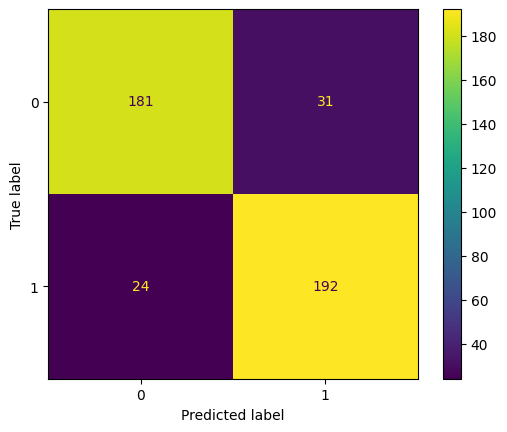

In [63]:
cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

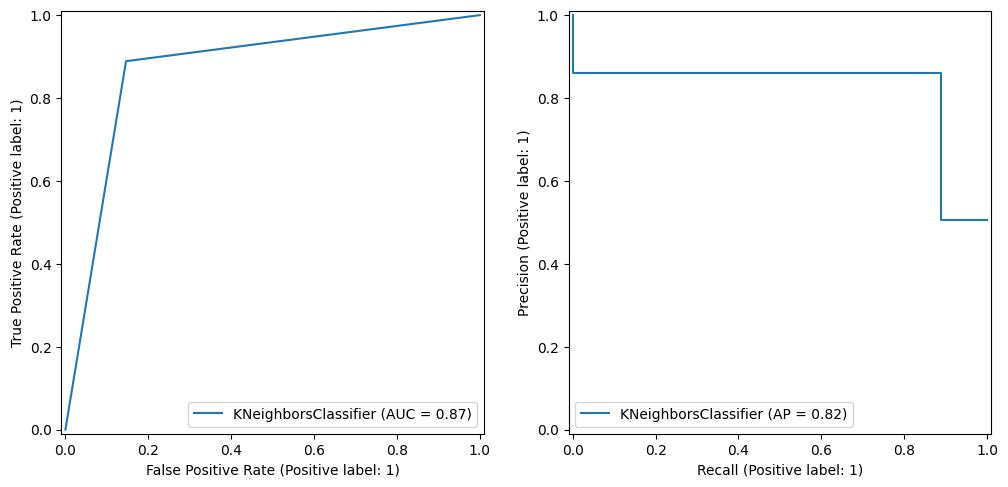

In [64]:
# ROC and Precision Recall
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
RocCurveDisplay.from_estimator(knn,x_test,y_test,ax = ax1)
PrecisionRecallDisplay.from_estimator(knn,x_test,y_test,ax = ax2)

#**2 Methods for choosing K values**

 * elbow method
 * K fold crosss validation Grid Search method

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy = accuracy_score(y_test,preds)

In [68]:
error = 1 - accuracy
error

0.12850467289719625

#**Elbow Method for Choosing Reasonable K Values**

NOTE: This uses the test set for the hyperparameter selection of K.

In [69]:
test_errors = []

for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  preds = knn.predict(x_test)

  error = 1 - accuracy_score(y_test,preds)
  test_errors.append(error)

Text(0, 0.5, 'Test Error')

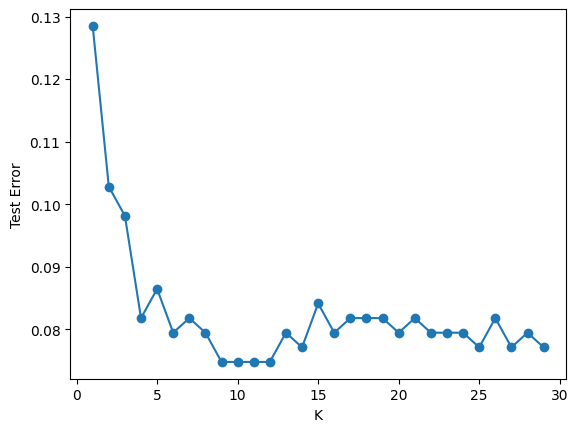

In [71]:
plt.plot(range(1,30),test_errors,marker = 'o')
plt.xlabel('K')
plt.ylabel('Test Error')

**IMPORTANT :**

Here we may be tempted to choose K value of lowest error rate.

 * However we need to take note that higher K value means MORE complex model.
 * There is no so much improvement error rate start from K value of around 8 or 9 .. all the way to the higer K value. So we need to make a call of whether chooing a K value of 16 is really worth to use, to drop an error rate of 1%.
 * Although it depends to context, we need to take into consideration for all those points.

#**Full Cross Validation Grid Search for K Value**

Creating a Pipeline to find K value

We'll use a Pipeline object to set up a workflow of operations:

 * Scale Data
 * Create Model on Scaled Data
Pipeline can be used for any operations with any algorithms/models.

In [72]:
# PIPELINE => GRIDSEARCH CV

**1) Create scaler and model that we want to use**

In [73]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

**2) setting up operations**
 * each operation in tuple pair form
 * need to pass in order of sequence we want to perform. Here want to do 1) scaling first 2) then Modeling
 * always best practice to use same string name and object naming for eaiser understaing

In [74]:
operations = [('Scaler', scaler), ('knn', knn)]

**3) setting up pipeline**
 * create pipeline object and pass in operations object as steps

In [75]:
from sklearn.pipeline import Pipeline

In [76]:
pipe  = Pipeline(operations)

**4) using GridSearchCV with pipeline**

 * we don't really have to use pipeline for GridSearchCV
 * but pipeline allows us to streamline our codes and operations

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
# define range of k values want to setup
k_values = list(range(1,30))

**4.1) Set up Parameters for pipeline**
As we are using pipeline, we need to define parameters in specific format

* chosen_string_name + two underscores + parameter key name

Example: knn__metric: [...]

In [79]:
# we can get Parameter Key Name to use when passing into pipeline
# depends on the algorithms / models we use, these parameters needs to be aligned accordingly
# here we are just searching for KNN model
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [81]:
# Set up the parameters
parameters = {'knn__n_neighbors': k_values}

**4.2) GridSearchCV**

In [82]:
full_cv_classifier = GridSearchCV(pipe,parameters,cv =5,scoring = 'accuracy')

**NOTE: we don't need to manually scale the train data. Because piepeline will take care of it as we define the scaling step as 1st step of operations.** so we can just pass in X_train directly.

In [83]:
full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [86]:
# check the best estimator
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=29))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=29),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 29,
 'knn__p': 2,
 'knn__weights': 'uniform'}

As from the data above, the best n_neighbors is 29.

**How many total runs did we do?**

In [89]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.00984273, 0.00754256, 0.00835271, 0.01165013, 0.00449805,
        0.0046411 , 0.00566206, 0.00338593, 0.00306768, 0.00400348,
        0.00454535, 0.00450521, 0.00469222, 0.004737  , 0.00493507,
        0.00456839, 0.0045855 , 0.00599236, 0.00467134, 0.0049428 ,
        0.00466943, 0.00507874, 0.00449595, 0.00466595, 0.00464659,
        0.00347543, 0.00289826, 0.003332  , 0.0031961 ]),
 'std_fit_time': array([4.18015980e-03, 4.14338926e-03, 2.97173653e-03, 9.28806137e-03,
        1.17395372e-04, 2.21917852e-04, 2.02666392e-03, 8.50359623e-04,
        2.34651047e-04, 7.55892415e-04, 1.89954987e-04, 1.98537116e-04,
        1.53613784e-04, 3.81704961e-04, 3.98016733e-04, 2.16565316e-04,
        7.99223744e-05, 2.56341445e-03, 1.94014428e-04, 5.80842203e-04,
        8.48918805e-05, 1.06304626e-03, 1.26850927e-04, 2.00562980e-04,
        3.30719087e-04, 6.91569672e-04, 1.10345764e-04, 7.55415874e-04,
        5.35289642e-04]),
 'mean_score_time': array([0.04983025, 

In [90]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [91]:
len(k_values)

29

In [92]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.85847953, 0.87076023, 0.89005848, 0.89181287, 0.89883041,
       0.90292398, 0.90584795, 0.90409357, 0.90760234, 0.90584795,
       0.90818713, 0.90409357, 0.90935673, 0.90760234, 0.91169591,
       0.90994152, 0.9122807 , 0.90994152, 0.9122807 , 0.91111111,
       0.91169591, 0.91052632, 0.9122807 , 0.91403509, 0.91345029,
       0.9128655 , 0.9128655 , 0.91461988, 0.91520468])

There are many ways that we can do for final prediction.

 * retrain on full dataset with trained full_cv_classifier model
 * make predicting on hold out test set with trained full_cv_classifier mode
 * or create a new model with best K value that we got from GridSearchCV, retrain and make prediction

**continue using the model for prediction**

In [95]:
full_pred = full_cv_classifier.predict(x_test)

In [97]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       212
           1       0.92      0.93      0.92       216

    accuracy                           0.92       428
   macro avg       0.92      0.92      0.92       428
weighted avg       0.92      0.92      0.92       428



We can make the direct prediction like above or we can create a new model with best K value that we found from GridSearchCV as below.

#**Final Model**
We just saw that our GridSearch recommends a K=29 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [102]:
scaler = StandardScaler()
knn29 = KNeighborsClassifier(n_neighbors = 29)

In [103]:
operations = [('Scaler', scaler), ('knn', knn29)]

In [104]:
pipeline = Pipeline(operations)

In [105]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=29))])

In [107]:
pipeline_pred = pipeline.predict(x_test)

In [109]:
print(classification_report(y_test,pipeline_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       212
           1       0.92      0.93      0.92       216

    accuracy                           0.92       428
   macro avg       0.92      0.92      0.92       428
weighted avg       0.92      0.92      0.92       428



In [110]:
new_patient = [[3.8, 6.4]]

In [111]:
pipeline.predict(new_patient)

array([0])

In [113]:
pipeline.predict_proba(new_patient)

array([[0.79310345, 0.20689655]])

We are ambivalent that this new patient doesn't have cancer.